In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [25]:
dailyDF  = pd.read_csv('..\Data\daily.csv')
print(dailyDF.dtypes)
dailyDF

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [14]:
def find_na(data, column_name):
    dataX = data[column_name]
    null_sum_column = dataX.isnull().sum(axis = 0)
    percent_NA_column = ((( null_sum_column / len(dataX)) * 100 ).round(2))
    print(f'Percentage of NA in column {column_name} is {percent_NA_column}')
    
def outlier_percetage(data , column_name):
    lower =  data[column_name].quantile(.15)
    upper =  data[column_name].quantile(.85)
    outlier_per = ((len(data[data[column_name] < lower]) +  len(data[data[column_name] > upper])) / len(data))*100
    print(f'Percentage of outlier in column {column_name} is {outlier_per}')
    

## Percentage NA

In [16]:
for column_name in hourlyDF.columns:
    find_na(hourlyDF,column_name)

Percentage of NA in column instant is 0.0
Percentage of NA in column dteday is 0.0
Percentage of NA in column season is 0.0
Percentage of NA in column yr is 0.0
Percentage of NA in column mnth is 0.0
Percentage of NA in column hr is 0.0
Percentage of NA in column holiday is 0.0
Percentage of NA in column weekday is 0.0
Percentage of NA in column workingday is 0.0
Percentage of NA in column weathersit is 0.0
Percentage of NA in column temp is 0.0
Percentage of NA in column atemp is 0.0
Percentage of NA in column hum is 0.0
Percentage of NA in column windspeed is 0.0
Percentage of NA in column casual is 0.0
Percentage of NA in column registered is 0.0
Percentage of NA in column cnt is 0.0


## Percentage Outlier 

In [26]:
# list of continues columns
conti_col = ['temp','atemp','hum','windspeed','casual','registered','cnt']
for col in conti_col:
    outlier_percetage(hourlyDF,col)

Percentage of outlier in column temp is 26.969330801542093
Percentage of outlier in column atemp is 26.09471200874619
Percentage of outlier in column hum is 30.6576903158985
Percentage of outlier in column windspeed is 26.370907416997525
Percentage of outlier in column casual is 23.988722020829737
Percentage of outlier in column registered is 29.64497381897693
Percentage of outlier in column cnt is 29.610449392945508


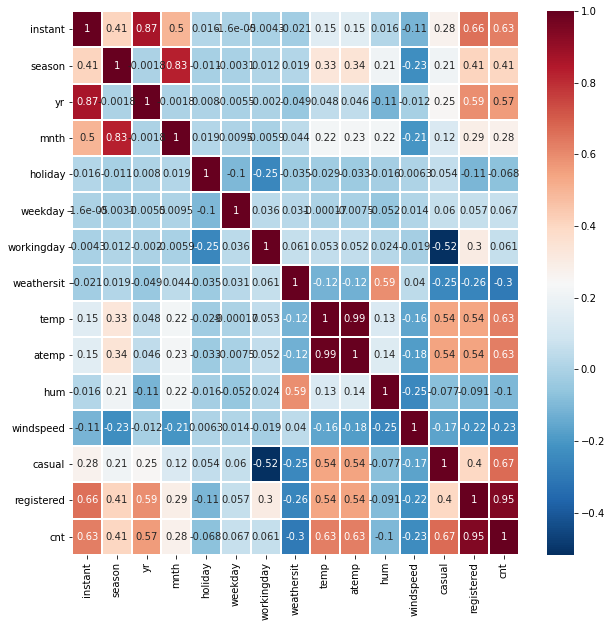

In [24]:
## co-relation between columns
import seaborn as sb
pearsoncorr = dailyDF.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10)) 
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1, ax=ax)
plt.show()

## Normalization of dailyDF

In [29]:
conti_col = ['temp','atemp','hum','windspeed','casual','registered','cnt']
def normalize(data,column):
    x = data[column].values.reshape(-1,1) #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data[column] = x_scaled
    
for column in conti_col:
    normalize(dailyDF,column)
    normalize(dailyDF,column)

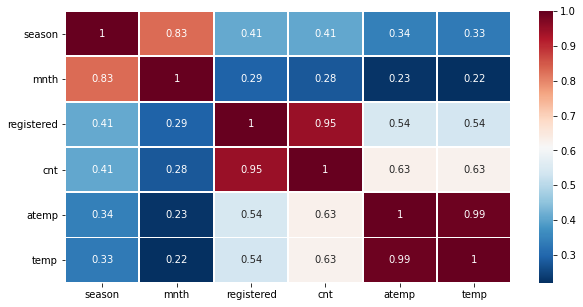

In [49]:
column_group_1 = ['season','mnth','registered','cnt','atemp','temp']

pearsoncorr_1 = dailyDF[column_group_1].corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,5)) 
sb.heatmap(pearsoncorr_1, 
            xticklabels=pearsoncorr_1.columns,
            yticklabels=pearsoncorr_1.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1, ax=ax)
plt.show()

## Drop columns

In [57]:
drop_columns = ['mnth','registered','atemp','instant','dteday','season','yr']
dataDF = dailyDF.drop(drop_columns,axis=1)
dataDF.head()

,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt
0,0,6,0,2,0.355170,0.828620,0.284606,0.096538,0.110792
1,0,0,0,2,0.379232,0.715771,0.466215,0.037852,0.089623
2,0,1,1,1,0.171000,0.449638,0.465740,0.034624,0.152669
3,0,2,1,1,0.175530,0.607131,0.284297,0.031103,0.177174
4,0,3,1,1,0.209120,0.449313,0.339143,0.023474,0.181546


In [65]:
optimize_data_x = dataDF[['holiday','weekday','workingday','weathersit','temp','hum','windspeed','casual']]
optimize_data_y = dataDF['cnt']
X_train, X_test, y_train, y_test = train_test_split(optimize_data_x, optimize_data_y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
predict_y = reg.predict(X_test)
mae = mean_absolute_error(y_test, predict_y, multioutput='raw_values')
print(f'Mean Absolute Error for linear regression model {mae}')

Mean Absolute Error for linear regression model [0.09681925]
